# MNIST Dataset for Characher recognision form Strach

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [4]:

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



Initailze Parameter 

In [13]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


[[ 0.46914852  0.15330234  0.04272471 ...  0.29565609  0.13772959
   0.08289617]
 [-0.3880924  -0.06005268  0.04818964 ...  0.08494048 -0.48884403
   0.01798956]
 [-0.33813507 -0.38973215 -0.32754881 ...  0.17611604  0.00635563
   0.04101564]
 ...
 [-0.00954002 -0.05177735  0.13747931 ... -0.0634341   0.25898675
  -0.16933021]
 [ 0.17723677  0.46601419  0.38319214 ... -0.06422804  0.16637948
   0.41241925]
 [-0.33097053 -0.35068314  0.06643637 ... -0.10903721 -0.02120797
   0.00492938]]


(array([[ 0.46914852,  0.15330234,  0.04272471, ...,  0.29565609,
          0.13772959,  0.08289617],
        [-0.3880924 , -0.06005268,  0.04818964, ...,  0.08494048,
         -0.48884403,  0.01798956],
        [-0.33813507, -0.38973215, -0.32754881, ...,  0.17611604,
          0.00635563,  0.04101564],
        ...,
        [-0.00954002, -0.05177735,  0.13747931, ..., -0.0634341 ,
          0.25898675, -0.16933021],
        [ 0.17723677,  0.46601419,  0.38319214, ..., -0.06422804,
          0.16637948,  0.41241925],
        [-0.33097053, -0.35068314,  0.06643637, ..., -0.10903721,
         -0.02120797,  0.00492938]]),
 array([[-0.04312298],
        [ 0.06089756],
        [ 0.12038944],
        [ 0.22331729],
        [ 0.15410319],
        [ 0.13240535],
        [ 0.13953218],
        [ 0.48514181],
        [ 0.49576774],
        [-0.41536857]]),
 array([[ 0.36917731,  0.44916599,  0.44186319,  0.20658147, -0.35868426,
         -0.13706278, -0.33663157,  0.21930135,  0.3218011 ,  0.088

Helper function 

In [6]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

Forward Propogration

In [7]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

Backward Propagation

In [8]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2



Updating Parameter (While traning & backbord propagation)

In [9]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

Performing the Gradient decent on the data set 

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[9 5 4 ... 9 9 7] [2 5 7 ... 1 3 7]
0.11404878048780488
Iteration:  10
[0 5 4 ... 9 8 7] [2 5 7 ... 1 3 7]
0.1572439024390244
Iteration:  20
[1 5 4 ... 1 3 7] [2 5 7 ... 1 3 7]
0.265609756097561
Iteration:  30
[1 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.35
Iteration:  40
[1 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.40656097560975607
Iteration:  50
[1 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.44658536585365854
Iteration:  60
[1 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.4921219512195122
Iteration:  70
[1 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.5366585365853659
Iteration:  80
[1 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.5709024390243902
Iteration:  90
[1 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.5978292682926829
Iteration:  100
[1 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.6204878048780488
Iteration:  110
[1 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.639390243902439
Iteration:  120
[2 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.6556829268292683
Iteration:  130
[2 5 7 ... 1 3 7] [2 5 7 ... 1 3 7]
0.6703658536585366
Iteration:  140
[2 5 7 ... 1 3

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    print("Status : ", prediction[0]==label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [4]
Label:  4
Status :  True


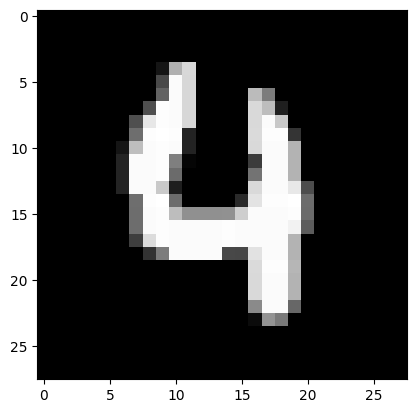

Prediction:  [7]
Label:  7
Status :  True


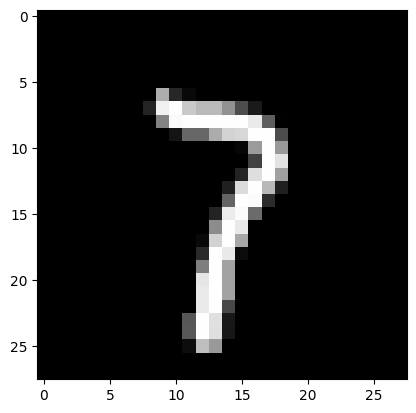

Prediction:  [1]
Label:  1
Status :  True


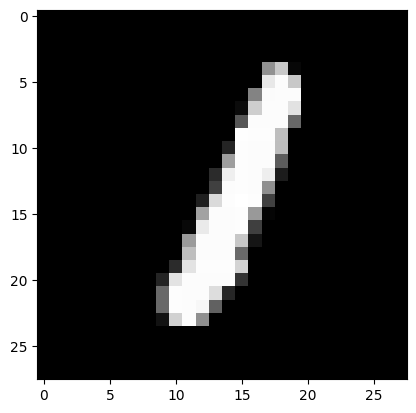

Prediction:  [7]
Label:  7
Status :  True


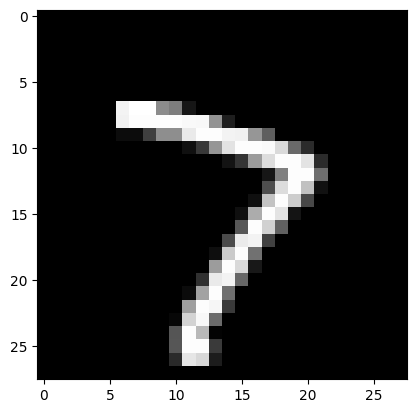

Prediction:  [6]
Label:  6
Status :  True


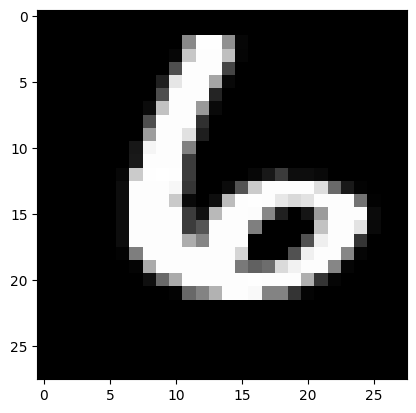

In [17]:
test_prediction(40, W1, b1, W2, b2)
test_prediction(41, W1, b1, W2, b2)
test_prediction(42, W1, b1, W2, b2)
test_prediction(43, W1, b1, W2, b2)
test_prediction(44, W1, b1, W2, b2)